# Black-Scholes Equation 

$$
C = S_t \Phi (d_1) - Ke^{-rt} \Phi (d_2)
$$

$$
\Phi(x) = \int_{-\infty}^x \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}} \, ds
$$

$$
d_1 = \frac{ln(\frac{S_t}{K}) + (r + \frac{\sigma^2}{2})t}{\sigma\sqrt{t}}
$$

$$
d_2 = d_1 - \sigma \sqrt{t}
$$

$$
\frac{dS_t}{S_t} = \mu dt + \sigma dW_t
$$

The Black Scholes Equation is used to price European options. The formula gives the theoretical price of the option based on several factors like stock price, strike price, time to expiration, risk-free rate, and volatility.

The formula calculates the price of a European call option ( ie, the right to buy a stock at a fixed price K by a future date 
t). In simple terms, Black-Scholes is a math trick to price options by balancing probabilities, time, and risk. 

It sort of defines what the risk neutral price of that option would be ; taking into account all possible states of the world going forward and assuming some underlying dynamics for the stock price. It tells you the fair price to pay today for the contract; and if there is a mispricing in the marketplace/ your quote for that option contract falls outside of this fair price then there may be some statictical arbitrage that you can take advantage of.

The Black-Scholes Model is the solution to the Black scholes partial differential Equation which is derived from a hedge portfolio argument where the underlying asset dynamics are assumed to follow a geometric brownian motion and the derivative contract that is held within central portfolio is infact a European call option. 

**Components of the formula**

C: Price of the call option (what you’re trying to calculate).

S
t : Current stock price.


K: Strike price (the fixed price you can buy the stock for later).


e 
−rt
 : Discount factor (how much future money is worth today, using risk-free rate 
r
r).


Φ(d 
1
​
 ) and 
Φ
(
d
2): Probabilities from the "bell curve" (likelihood the option will be profitable).

In [1]:
import numpy as np
from scipy.stats import norm

def black_scholes_call(S, K, sigma, r, t):
    d1 = (np.log(S/K) + (r + ((sigma**2)/2))*t) / (sigma * np.sqrt(t))
    d2 = d1 - (sigma * np.sqrt(t))
    C = S * norm.cdf(d1) - K * np.exp(-r*t) * norm.cdf(d2)
    return C

black_scholes_call(100, 100, .3, .05, 1)

14.231254785985819

In [3]:
!pip install qfin

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for qfin from https://files.pythonhosted.org/packages/eb/30/346cbbf079edcb76e050e773fe19db8de32658dfe4fa0e09ea41151b081a/qfin-0.1.24-py3-none-any.whl.metadata


# Trading Options with the assumptions of Black Scholes being held

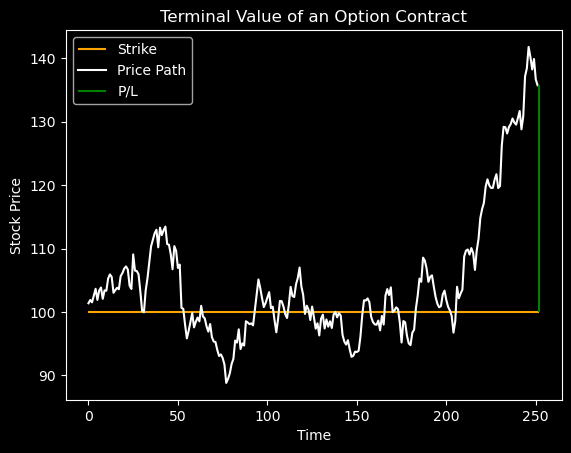

Premium at t=0: 14.231254785985819
P/L: 21.50897993344983


In [5]:
import matplotlib.pyplot as plt
import qfin as qf

# simulate dynamics of the underlying according to Geometric Brownian Motion
path = qf.simulations.GeometricBrownianMotion(100, 0.05, .3, 1/252, 1)


# create a chart of the price path and the strike price
plt.title("Terminal Value of an Option Contract")
plt.hlines(100, 0, 252, label='Strike', color='orange')
plt.plot(path.simulated_path, label='Price Path', color='white')
if max(path.simulated_path[-1] - 100, 0) == 0:
    plt.vlines(252, path.simulated_path[-1], 100, color='red', label="P/L")
else:
    plt.vlines(252, 100, path.simulated_path[-1], color='green', label="P/L")
plt.style.use('dark_background')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# print the premium and the resulting P/L
print("Premium at t=0:", black_scholes_call(100, 100, .3, .05, 1))
print("P/L:", max(path.simulated_path[-1] - 100, 0) - black_scholes_call(100, 100, .3, .05, 1))

# Trick to make Money using the Black-Scholes Model

Let T be a trading strategy such that options are bought/sold when there is a theoretical discrepency between the model price and market maker quote.

In [6]:
print("Call Price:", black_scholes_call(100, 100, .3, .05, 1))
print("Market Maker Quote:", "13.43 @ 14.10")
print("Trade Edge:", black_scholes_call(100, 100, .3, .05, 1) - 14.10)

Call Price: 14.231254785985819
Market Maker Quote: 13.43 @ 14.10
Trade Edge: 0.13125478598581886


# Computing the P/L Edge with Respect to the Model Dynamics

In [7]:
premium = 14.10 * 100
pls = []

for i in range(100000):
    path = qf.simulations.GeometricBrownianMotion(100, 0.05, .3, 1/252, 1)
    pls.append(max(path.simulated_path[-1] - 100, 0)*100 - premium)

np.mean(pls)

94.97510751785194

# Simulating an Equity Curve Assuming Underlying Dynamics

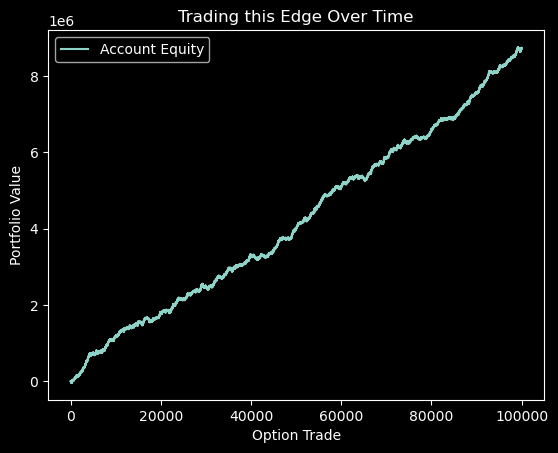

In [8]:
premium = 14.10 * 100
pls = []

for i in range(100000):
    path = qf.simulations.GeometricBrownianMotion(100, 0.05, .3, 1/252, 1)
    pls.append(max(path.simulated_path[-1] - 100, 0)*100 - premium)

plt.title("Trading this Edge Over Time")
plt.plot(np.cumsum(pls), label="Account Equity")
plt.style.use('dark_background')
plt.xlabel('Option Trade')
plt.ylabel('Portfolio Value')
plt.legend()
plt.show()